# COGS 108 - Assignment 3: Data Privacy

## Important Reminders

- Rename this file to 'A3_$####.ipynb', replacing with your unique ID (first letter of your last name, followed by the last 4 digits of your student ID number), before you submit it. Submit it to TritonED.
- Do not change / update / delete any existing cells with 'assert' in them. These are the tests used to check your assignment. 
    - Changing these will be flagged for attempted cheating. 
- This assignment has hidden tests: tests that are not visible here, but that will be run on your submitted file. 
    - This means passing all the tests you can see in the notebook here does not guarantee you have the right answer!

## Overview

We have discussed in lecture the importance and the mechanics of protecting individuals privacy when they are included in datasets. 

One method to do so is the Safe Harbor Method. The Safe Harbour method specifies how to protect individual's identities by telling us which tells us which information to remove from a dataset in order to avoid accidently disclosing personal information. 

In this assignment, we will explore web scraping, which can often include personally identifiable information, how identity can be decoded from badly anonymized datasets, and also explore using Safe Harbour to anonymize datasets properly. 

The topics covered in this assignment are mainly covered in the 'DataGathering' and 'DataPrivacy&Anonymization' Tutorial notebooks.

### Installing new packages

In the first part of the assignment we will understand how we can scrape the web for data. You have to use the Beautiful Soup library in Python for scraping the data. 

The library is not installed in Anaconda version, therefore to install a new library for Anaconda, we can use the conda package manager, which the cell below does for you. 

In [1]:
# Run this cell to install beautifulsoup4
#  You only need to do the installation once
#    Once you have run it you can comment these two lines so that the cell doesn't execute everytime.

#import sys
#!conda install --yes --prefix {sys.prefix} beautifulsoup4

### Imports

In [1]:
# Imports - these provided for you. Do not import any other packages
import pandas as pd
import requests
import bs4
from bs4 import BeautifulSoup
import geopy
from geopy.geocoders import Nominatim
import numpy as np

In [2]:
import os 
from geopy import geocoders
from geopy.geocoders import Yandex
import time 


g = Yandex()

#for creating and showing histograms 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:


def find_location(address):
    location = g.geocode(address)
    return location

#location = g.geocode('7800 BLOCK STALMER STREET')
#location
#print(location.address)
#print((location.latitude, location.longitude))
#print(location.raw)
#(40.7407597+ 40.7413004)/2, (-73.9898715 + -73.9895014)/2
#"175 5th Avenue NYC"

In [3]:
stuff = pd.read_csv('Crime_Data.csv', encoding = 'ISO-8859-1')
stuff2 = stuff[:10]
stuff2

,agency,Charge_Description_Orig,activityDate,BLOCK_ADDRESS,ZipCode,community
0,SAN DIEGO,GRAND THEFT FROM PERSON,1/3/2018 16:30,7800 BLOCK STALMER STREET,92111.0,SAN DIEGO
1,HARBOR POLICE,SELL LIQUOR TO MINOR (M),9/23/2017 18:28,3200 BLOCK NORTH HARBOR DRIVE,92101.0,SAN DIEGO
2,HARBOR POLICE,"DRUNK IN PUBLIC: ALCOHOL, DRUGS, COMBO OR TOLU...",10/6/2017 8:48,600 BLOCK CONVENTION WAY,92101.0,SAN DIEGO
3,HARBOR POLICE,"DRUNK IN PUBLIC: ALCOHOL, DRUGS, COMBO OR TOLU...",10/11/2017 19:45,3600 BLOCK NORTH HARBOR DRIVE,92101.0,SAN DIEGO
4,HARBOR POLICE,POSS NARCOTIC CONTROLLED SUBS (M),10/21/2017 23:36,100 W BLOCK HARBOR DRIVE,92101.0,SAN DIEGO
5,SAN DIEGO,POSSESS MARIJUANA 1 OZ OR LESS WHILE DRIVING,1/8/2018 12:25,7600 BLOCK COPLEY PARK PLACE,92111.0,SAN DIEGO
6,HARBOR POLICE,MANUFACTURE/SALE/POSSESS/ETC METAL KNUCKLES (M),11/1/2017 17:15,3600 BLOCK NORTH HARBOR DRIVE,92101.0,SAN DIEGO
7,HARBOR POLICE,MINOR:KNOWINGLY OPER VEH W/CARRYING ALC (M),11/4/2017 4:30,W LAUREL STREET / PACIFIC HIGHWAY,92101.0,SAN DIEGO
8,HARBOR POLICE,USE/UNDER INFL OF CONTROLLED SUBS (M),11/12/2017 8:11,3100 BLOCK PACIFIC HIGHWAY,92101.0,SAN DIEGO
9,HARBOR POLICE,BURGLARY (COMMERCIAL) (F),9/1/2017 19:53,3700 BLOCK NORTH HARBOR DRIVE,92101.0,SAN DIEGO


In [88]:
count = 0
date = []
christmas = []
for x in stuff['activityDate']:
    if(x.find('2018') == -1):
        date.append(x[:x.find('2017')+ 4])
    else:
        date.append(x[:x.find('2018')+ 4])
date
stuff['date'] = date
#stuff = stuff['agency', 'Charge_Description_Orig' , 'activityDate', 'date', 'BLOCK_ADDRESS', 'ZipCode', 'community']

#loop through stuff to find all crimes that happened on christmas and add them to a list.
for i, row in enumerate(stuff.values):
    if(row[6].find('12/25/2017') != -1):
        christmas.append(row)

#same idea as above loop but used to check total crimes on any day. you can play around with the specifc day by changing the value
# in "('12/30/2017')"
for i, row in enumerate(stuff.values):
    if(row[6].find('12/30/2017') != -1):
        count = count + 1
print(count)

329


In [16]:

#location = find_location('7800 BLOCK STALMER STREET')
#stuff2.BLOCK_ADDRESS.apply(find_location)
#s = stuff2.BLOCK_ADDRESS
#for x in range(0, s.size):
#print(g.geocode(s[0]))
#time.sleep(1.5)
#print(g.geocode(s[0]))

loc_coordinates = []
loc_address = []

for address in stuff2.BLOCK_ADDRESS:
    inputAddress = address
    location = g.geocode(inputAddress)
    if (location is not None):
        print(location
        

SyntaxError: unexpected EOF while parsing (<ipython-input-16-2870c8800545>, line 18)

In [ ]:
loc_coordinates

In [4]:
#function that finds the street that the crimes commited by cleaning it of anything other than the street name
def standardize_address(string):
    
    string = string.lower()
    string = string.strip()
    string = ' '+ string
    
    #gets rid of numbers in address so we can see crimes in a street
    string = ''.join(index for index in string if not index.isdigit())
    
    string = string.replace('block', '')
    string = string.replace('drive', '')
    string = string.replace('highway', '')
    string = string.replace('way', '')
    string = string.replace('place', '')
    string = string.replace('street', '')
    
    string = string.replace('north', '')
    string = string.replace('south', '')
    string = string.replace('east', '')
    string = string.replace('west', '')
    string = string.replace(' n ', '')
    string = string.replace(' s ', '')
    string = string.replace(' e ', '')
    string = string.replace(' w ', '')
    
    string = string.strip()
    return string

C:\Users\Shonak\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


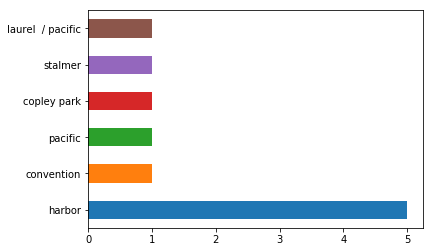

In [6]:
#creates street name column that only contains the names of the streets
stuff2['street name'] = stuff2.BLOCK_ADDRESS.apply(standardize_address)

#creates a histogram to see which streets have most crimes in form of a bar chart
stuff2['street name'].value_counts().plot(kind = 'barh')

## Part 1: Web Scraping 

### Scraping Rules

1) If you are using another organizations website for scraping, make sure to check the website's terms & conditions. 

2) Do not request data from the website too aggressively (quickly) with your program (also known as spamming), as this may break the website. Make sure your program behaves in a reasonable manner (i.e. acts like a human). One request for one webpage per second is good practice.

3) The layout of a website may change from time to time. Because of this, if you're scraping website, make sure to revisit the site and rewrite your code as needed.

In [47]:
# This cell will help you understand the permission issues related to accessing a page
# Uncomment the two lines, run them, see what error you get, comment them again

page_source = requests.get('http://www.aflcio.org/Legislation-and-Politics/Legislative-Alerts')
page_soup = BeautifulSoup(page_source.content, 'html.parser')

#### What is the error that you got, and why did you get it?

YOUR ANSWER HERE

In [4]:
# 1a) Web Scrape
# We will first retrieve the contents on a page and examine them a bit.

# Make a variable called 'wiki', that stores the following URL (as a string):
#  'https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population'
# To open the URL you can use 'requests.get' as shown in the cell above. Call this variable 'page'
# After that use BeautifulSoup Library to open the URL and assign it to an object called 'soup'

wiki = 'https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population'
page = requests.get(wiki)
soup = BeautifulSoup(page.content, 'html.parser')
#raise NotImpementedError()

In [5]:
assert wiki
assert page
assert soup


In [6]:
# 1b) Checking Scrape Contents

# Extract the title from the page and save it in a variable called 'title_page'. 
#  Make sure you extract it as a string.
# To do so, you have to use the soup object created in the above cell. 
#  Hint: from your soup variable, you can access this with '.title.string'
# Make sure you print out and check the contents of 'title_page'. 
#  Note that it should not have any tags (such as '<title>' included in it).

title_page = soup.title.string
title_page
#raise NotImplementedError()

'List of U.S. states and territories by population - Wikipedia'

In [7]:
assert title_page
assert isinstance(title_page, str)


In [8]:
# 1c) Extracting Tables

# In order to extract the data we want, we'll start with extracting a data table of interest. 
#  Note that you can see this table by going to look at the link we scraped.
# Use the soup object and call a method called find, which will and extract the first table in scraped webpage. 
#  Note: you need to search for the name 'table', and set the 'class_' argument as 'wikitable sortable'.

right_table = soup.find('table', class_ = 'wikitable sortable')
#raise NotImplementedError()

In [9]:
assert right_table
assert isinstance(right_table, bs4.element.Tag)
assert right_table.name == 'table'

In [10]:
# Extract the data from the table into lists.
#  Note: This code provided for you. Do read through it and try to see how it works.

lst_a, lst_b, lst_c = [], [], []

for row in right_table.findAll('tr'):
    
    cells = row.findAll('td')
    
    # Skips rows that aren't 10 columns long (like the heading)
    if len(cells) != 10:
        continue

    # This catches when the name cells stops having a link
    #  and ends, skipping the last (summary rows)
    try:
        lst_a.append(cells[2].find('a').text)
        lst_b.append(cells[4].find(text=True))
        lst_c.append(cells[5].find(text=True))
    except:
        break

In [11]:
# 1d) Collecting into a dataframe

# Create a dataframe 'my_df' and add the data from the lists above to it. 
#  'lst_a' is the state or territory name. Set the column name as 'State', and make this the index
#  'lst_b' is the population estimate. Add it to the dataframe, and set the column name as 'Population Estimate'
#  'lst_c' is the census population. Add it to the dataframe, and set the column name as 'Census Population'

my_df = pd.DataFrame({'State': lst_a}).set_index('State')
my_df['Population Estimate'] = lst_b
my_df['Census Population'] = lst_c
#raise NotImplementedError()

In [12]:
assert isinstance (my_df, pd.DataFrame)
assert my_df.index.name == 'State'
assert list(my_df.columns) == ['Population Estimate', 'Census Population']


In [13]:
# 1e) Using the data
# What is the Population Estimate of California? Save this answer to a variable called 'calif_pop'
# Notes
#  Extract this value programmatically from your dataframe (as in, don't set it explicitly, as 'cf = 123')
#    You can use '.loc' to extract a particular value from a dataframe.
#  The data in your dataframe will be strings - that's fine, leave them as strings (don't typecast).

calif_pop = my_df.loc['California', 'Population Estimate']
#raise NotImplementedError()

In [14]:
assert calif_pop


## Part 2: Identifying Data

Data Files:
- anon_user_dat.json
- employee_info.json

You will first be working with a file called 'anon_user_dat.json'. This file that contains information about some (fake) Tinder users. When creating an account, each Tinder user was asked to provide their first name, last name, work email (to verify the disclosed workplace), age, gender, phone # and zip code. Before releasing this data, a data scientist cleaned the data to protect the privacy of Tinder's users by removing the obvious personal identifiers: phone #, zip code, and IP address. However, the data scientist chose to keep each users' email addresses because when they visually skimmed a couple of the email addresses none of them seemed to have any of the user's actual names in them. This is where the data scientist made a huge mistake!

We will take advantage of having the work email addresses by finding the employee information of different companies and matching that employee information with the information we have, in order to identify the names of the secret Tinder users!

In [15]:
# 2a) Load in the 'cleaned' data 

# Load the json file into a pandas dataframe. Call it 'df_personal'.

df_personal = pd.read_json('anon_user_dat.json')
#raise NotImplementedError()

ValueError: Expected object or value

In [ ]:
assert isinstance(df_personal, pd.DataFrame)


In [ ]:
# 2b) Check the first 10 emails 

# Save the first 10 emails to a Series, and call it 'sample_emails'. 
# You should then and print out this Series. 
# The purpose of this is to get a sense of how these work emails are structured
#   and how we could possibly extract where each anonymous user seems to work.

sample_emails = df_personal['email'][0:10]
#sample_emails = df_personal['email'].head(n=10)
#raise NotImplementedError()

In [ ]:
assert isinstance(sample_emails, pd.Series)


In [ ]:
# 2c) Extract the Company Name From the Email 

# Create a function with the following specifications:
#   Function Name: extract_company
#   Purpose: to extract the company of the email 
#          (i.e., everything after the @ sign but before the .)
#   Parameter(s): email (string)
#   Returns: The extracted part of the email (string)
#   Hint: This should take 1 line of code. Look into the find('') method. 
#
# You can start with this outline:
#   def extract_company(email):
#      return 
#
# Example Usage: 
#   extract_company("larhe@uber.com") should return "uber"
#   extract_company(“ds@cogs.edu”) should return “cogs”


def extract_company(email):
    return email[email.find('@')+1 : email.find('.', email.find('@')+1)]
#raise NotImplementedError()

In [ ]:
assert extract_company("gshoreson0@seattletimes.com") == "seattletimes"


With a little bit of basic sleuthing (aka googling) and web-scraping (aka selectively reading in html code) it turns out that you've been able to collect information about all the present employees/interns of the companies you are interested in. Specifically, on each company website, you have found the name, gender, and age of its employees. You have saved that info in employee_info.json and plan to see if, using this new information, you can match the Tinder accounts to actual names.

In [ ]:
# 2d) Load in employee data 

# Load the json file into a pandas dataframe. Call it 'df_employee'.

df_employee = pd.read_json('employee_info.json')
#raise NotImplementedError()

In [ ]:
assert isinstance(df_employee, pd.DataFrame)


In [ ]:
# 2e) Match the employee name with company, age, gender 

# Create a function with the following specifications:
#   Function name: employee_matcher
#   Purpose: to match the employee name with the provided company, age, and gender
#   Parameter(s): company (string), age (int), gender (string)
#   Returns: The employee first_name and last_name like this: return first_name, last_name 
#   Note: If there are multiple employees that fit the same description, first_name and 
#         last_name should return a list of all possible first names and last name
#         i.e., ['Desmund', 'Kelby'], ['Shepley', 'Tichner']
#
# Hint:
# There are many different ways to code this.
# 1) An unelegant solution is to loop through df_employee 
#    and for each data item see if the company, age, and gender match
#    i.e., for i in range(0, len(df_employee)):
#              if (company == df_employee.ix[i,'company']):
#
# However! The solution above is very inefficient and long, 
# so you should try to look into this:
# 2) Google the df.loc method: It extracts pieces of the dataframe
#    if it fulfills a certain condition.
#    i.e., df_employee.loc[df_employee['company'] == company]
#    If you need to convert your pandas data series into a list,
#    you can do list(result) where result is a pandas "series"
# 
# You can start with this outline:
#   def employee_matcher(company, age, gender):
#      return first_name, last_name

def employee_matcher(company,age,gender):
    first_name,last_name = list(),list()
    new_df = df_employee.loc[df_employee['company']==company].loc[df_employee['age']==age].loc[df_employee['gender']==gender]
    if new_df.size !=0:
        first_name,last_name = list(new_df['first_name']), list(new_df['last_name'])
    return first_name, last_name
#employee_matcher("google", 41, "Male")
#print(employee_matcher("jalbum", 29, "Female"),df_employee.loc[df_employee['age'] == 29])
#print(employee_matcher("", 62, "Male"),df_employee.loc[df_employee['first_name'] == 'Desmund'])
#raise NotImplementedError()

In [ ]:
assert employee_matcher("google", 41, "Male") == (['Maxwell'], ['Jorio'])
assert employee_matcher("salon", 47, "Female") == (['Elenore'], ['Gravett'])


In [ ]:
# 2f) Extract all the private data 

# - Create 2 empty lists called 'first_names' and 'last_names'
# - Loop through all the people we are trying to identify in df_personal
# - Call the extract_company function (i.e., extract_company(df_personal.ix[i, 'email']) )
# - Call the employee_matcher function 
# - Append the results of employee_matcher to the appropriate lists (first_names and last_names)

first_names, last_names = list(), list()
for i in range(df_personal['email'].size):
#    company = extract_company(df_personal.loc[i]['email'])
    company = extract_company(df_personal.ix[i, 'email'])
    #a, b = employee_matcher(company, df_personal.loc[i]['age'],df_personal.loc[i]['gender'])
    a, b = employee_matcher(company, df_personal.ix[i, 'age'],df_personal.ix[i,'gender'])
    first_names.append(a)
    last_names.append(b)
    #i = i +1
#raise NotImplementedError()

In [ ]:
assert first_names[45:50]== [['Justino'], ['Tadio'], ['Kennith'], ['Cedric'], ['Amargo']]
assert last_names[45:50] == [['Corro'], ['Blackford'], ['Milton'], ['Yggo'], ['Grigor']]


In [ ]:
# 2g) Add the names to the original 'secure' dataset! 

# We have done this last step for you below, all you need to do is run this cell.
# For your own personal enjoyment, you should also print out
#   the new df_personal with the identified people. 

df_personal['first_name'] = first_names
df_personal['last_name'] = last_names

We have now just discovered the 'anonymous' identities of all the registered Tinder users...awkward.

## Part 3: Anonymize Data

You are hopefully now convinced that with some seemingly harmless data a hacker can pretty easily discover the identities of certain users. Thus, we will now clean the original Tinder data ourselves according to the Safe Harbor Method in order to make sure that it has been *properly* cleaned...

In [ ]:
# 3a) Load in personal data 

# Load the user_dat.json file into a pandas dataframe. Call it 'df_users'.
# Note: You might find that using the same method as A2 (or above) leads to an error.
# The file has a slightly different organization. 
#   Try googling the error and finding the fix for it.
# Hint: you can still use 'pd.read_json', you just need to add another argument.

df_users = pd.read_json('user_dat.json', lines = True)
#raise NotImplementedError()

In [ ]:
assert isinstance(df_users, pd.DataFrame)


In [ ]:
# 3b) Drop personal attributes 

# Remove any personal information, following the Safe Harbour method.
# Based on the Safe Harbour method, remove any columns from df_users that contain personal information.
#   Note that details on the Safe Harbour method are covered in the Tutorials.

df_users = df_users.drop(['email', 'first_name', 'ip_address', 'last_name', 'phone'], axis = 1)
#raise NotImplementedError()

In [ ]:
assert len(df_users.columns) == 3


In [ ]:
# 3c) Drop ages that are above 90 

# Safe Harbour rule C:
#   Drop all the rows which have age greater than 90 from df_users

#df_users['age'] = df_users.loc[df_users['age'] <= 90].dropna()

df_users = df_users[df_users.age <=90]
#raise NotImplementedError()

In [ ]:
assert df_users.shape == (993, 3)


In [ ]:
# 3d) Load in zip code data 

# Load the zip_pop.csv file into a (different) pandas dataframe. Call it 'df_zip'.
# Note that the zip data should be read in as strings, not ints, as would be the default. 
# In read_csv, use the parameter 'dtype' to specify to read 'zip' as str, and 'population' as int.

df_zip = pd.read_csv('zip_pop.csv', dtype = {'zip': str, 'population': int})
df_zip.drop_duplicates('zip', inplace=True)
#raise NotImplementedError()

In [ ]:
assert isinstance(df_zip, pd.DataFrame)


In [ ]:
# 3e) Sort zipcodes into "Geographic Subdivision" 

# The Safe Harbour Method applies to "Geographic Subdivisions"
#   as opposed to each zipcode itself. 
# Geographic Subdivision:
#   All areas which share the first 3 digits of a zip code
#
# Count the total population for each geographic subdivision
# Warning: you have to be savy with a dictionary here
# To understand how a dictionary works, check the section materials,
#   use google and go to discussion sections!
#
# Instructions: 
# - Create an empty dictionary: zip_dict = {}
# - Loop through all the zip_codes in df_zip
# - Create a dictionary key for the first 3 digits of a zip_code in zip_dict
# - Continually add population counts to the key that contains the 
#     same first 3 digits of the zip code
#
# To extract the population you will find this code useful:
#   population = list(df_zip.loc[df_zip['zip'] == zip_code]['population'])
# To extract the first 3 digits of a zip_code you will find this code useful:
#   int(str(zip_code)[:3])
#
# Note: this code may take some time (many seconds, up to a minute or two) to run

zip_dict = {}
for i, r in df_zip.iterrows():
    zip_code = r['zip']
    population = r['population']
    zip_key = int(zip_code[:3])
    if zip_key not in zip_dict.keys():
        zip_dict[zip_key] = population
    else:
        zip_dict[zip_key] += population
#raise NotImplementedError()

In [ ]:
assert isinstance(zip_dict, dict)
assert zip_dict[100] == 1502501


In [ ]:
# 3f) Explain this code excerpt 
# Note: you do not have to use this line of code at this point in the assignmnet.
#  It is one of the lines provided to you in 2e. Here, just write a quick comment on what it does. 

# In the cell below, explain in words what what the following line of code is doing:
population = list(df_zip.loc[df_zip['zip'] == zip_code]['population'])

Population is a list made up of the column 'population' from the dataframe created when trying to locate where in df_zip that the 'zip' is equal to the zip_code variable.

In [ ]:
# 3g) Masking the Zip Codes 

# In this part, you should write a for loop, updating the df_users dataframe.
# Go through each user, and update their zip-code, to Safe Harbour specifications:
#   If the user is from a zip code for the which the
#     "Geographic Subdivision" is less than equal to 20000:
#        - Change the zip code to 0 
#   Otherwise:
#         - Change the zip code to be only the first 3 numbers of the full zip cide
# Do all this re-writting the zip_code columns of the 'df_users' DataFrame
#
# Hints:
#  - This will be several lines of code, looping through the DataFrame, 
#      getting each zip code, checking the geographic subdivision with 
#      the population in zip_dict, and settig the zip_code accordingly. 

for i,r in df_users.iterrows():
    zip_code = r['zip']
    zip_key = int(str(zip_code)[:3]) 
    #geo_sub = zip_code(zip_key)
    if (zip_key not in zip_dict.keys()) or (zip_dict[zip_key]< 20000):
        df_users.loc[i, 'zip'] = 0
    else:
        df_users.loc[i, 'zip'] = zip_key
#raise NotImplementedError()

In [ ]:
assert len(df_users) == 993
assert sum(df_users.zip == 0) == 7
assert df_users.loc[671, 'zip'] == 359


In [ ]:
# 3h) Save out the properly anonymized data to json file 

# Save out df_users as a json file, called 'real_anon_user_dat.json'

df_users.to_json(path_or_buf = 'real_anon_user_dat.json')
#raise NotImplementedError()

In [ ]:
assert isinstance(pd.read_json('real_anon_user_dat.json'), pd.DataFrame)

Congrats, you're done! The users identities are much more protected now. 

Submit this notebook file to TritonED.